### Is there a correlation between post language and identified mentioned locations? `(Todd)`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('../Datasets/Master_Dataset_TranslactionsDetoxifiedGeoTopic.csv')

# set the width of the 'Narrative' column to 100 characters
pd.options.display.max_colwidth = 100

/var/folders/fn/pdhscw6s1wz7r1wk9ssprtz80000gn/T/ipykernel_24201/1551078304.py:1: DtypeWarning: Columns (0,1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datasets/Master_Dataset_TranslactionsDetoxifiedGeoTopic.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'Story Primary ID', 'Story ID', 'User Primary ID',
       'User ID', 'Gender', 'Age', 'Title', 'Narrative', 'Media',
       'Account Created Date', 'Date (No Timestamp)', 'Interest',
       'Narrative TikaDetect', 'Title TikaDetect', 'Narrative LangDetect',
       'Title LangDetect', 'Translated Narrative', 'Translated Title',
       'toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult',
       'threat', 'sexual_explicit', 'GeoTopic Name', 'GeoTopic Latitude',
       'GeoTopic Longitude'],
      dtype='object')

In [4]:
df.sample(5)

,Unnamed: 0,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,...,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,GeoTopic Name,GeoTopic Latitude,GeoTopic Longitude
1559,1559,93789,STY1649938742,252,USR1608420728,male,50,First time at Disney,Who wouldn’t smile?,https://image.pixstory.com/Pixstory-image-164993735918481.jpeg,...,0.000677,0.000001,0.000032,0.000067,0.000192,0.000020,0.000012,NaN,NaN,NaN
83540,83538,133823,STY1661666834,82209,USR1661666480,NaN,39,#umang,#umang,https://image.pixstory.com/Pixstory-image-16616668204796.png,...,0.012095,0.000010,0.000797,0.000672,0.001913,0.000347,0.000281,NaN,NaN,NaN
88444,88442,139757,STY1662579260,89368,USR1662558842,NaN,38,Arsenal 2-1 Aston Villa,"Arsenal 2-1 Aston Villa\n\nObligatory shot from my seat from the game, where I ended up getting ...",https://image.pixstory.com/Pixstory-image-166257909555882.jpeg,...,0.000542,0.000001,0.000029,0.000083,0.000126,0.000027,0.000014,NaN,NaN,NaN
20983,20983,123902,STY1660057298,11859,USR1638425715,male,21,"মহারাষ্ট্রের দীর্ঘ প্রতীক্ষিত মন্ত্রিসভা সম্প্রসারণ হল, ১৮ জন মন্ত্রী হিসাবে শপথ গ্রহণ করেন",https://bengali.nenow.in/top-news/eknath-shinde-expands-maharastra-cabinet-18-ministers-take/\nঅ...,https://image.pixstory.com/Pixstory-image-166005715863296.png,...,0.001182,0.000003,0.000090,0.000164,0.000296,0.000033,0.000043,NaN,NaN,NaN
87603,87601,138128,STY1662389243,87584,USR1662389016,NaN,18,Be happy😄,Be happy😄,https://image.pixstory.com/Pixstory-image-166238921363576.png,...,0.004838,0.000004,0.000141,0.000386,0.000810,0.000119,0.000214,NaN,NaN,NaN


In [5]:
# replace df with your original DataFrame
df = df.loc[:, ["Narrative TikaDetect", "GeoTopic Name"]]

In [7]:
df['Narrative TikaDetect'] = df['Narrative TikaDetect'].astype(str)
df['GeoTopic Name'] = df['GeoTopic Name'].astype(str)

In [8]:
# remove rows with 'GeoTopic Name' of 'nan'
df = df[df['GeoTopic Name'] != 'nan']

In [9]:
# df.sample(20)[['Narrative', 'GeoTopic Name', 'GeoTopic Latitude', 'GeoTopic Longitude']]
df.sample(5)

,Narrative TikaDetect,GeoTopic Name
10843,en,Republic of France
8095,en,CRDSA Nimroz
25116,en,Manchester City Centre
3550,en,British Indian Ocean Territory
85178,en,Cerro La Liga


# Language vs Location

In [10]:
# count the frequency of each GeoTopic Name
counts = df['GeoTopic Name'].value_counts()

# filter to include only GeoTopic Names with 10 or more counts
valid_names = counts[counts >= 200].index

# filter the original dataframe using the valid GeoTopic Names
df = df[df['GeoTopic Name'].isin(valid_names)]

In [11]:
# df = df.iloc[:10000]

In [13]:
# create a pivot table
pivot_table = df.pivot_table(index='Narrative TikaDetect', columns='GeoTopic Name', aggfunc=len, fill_value=0)

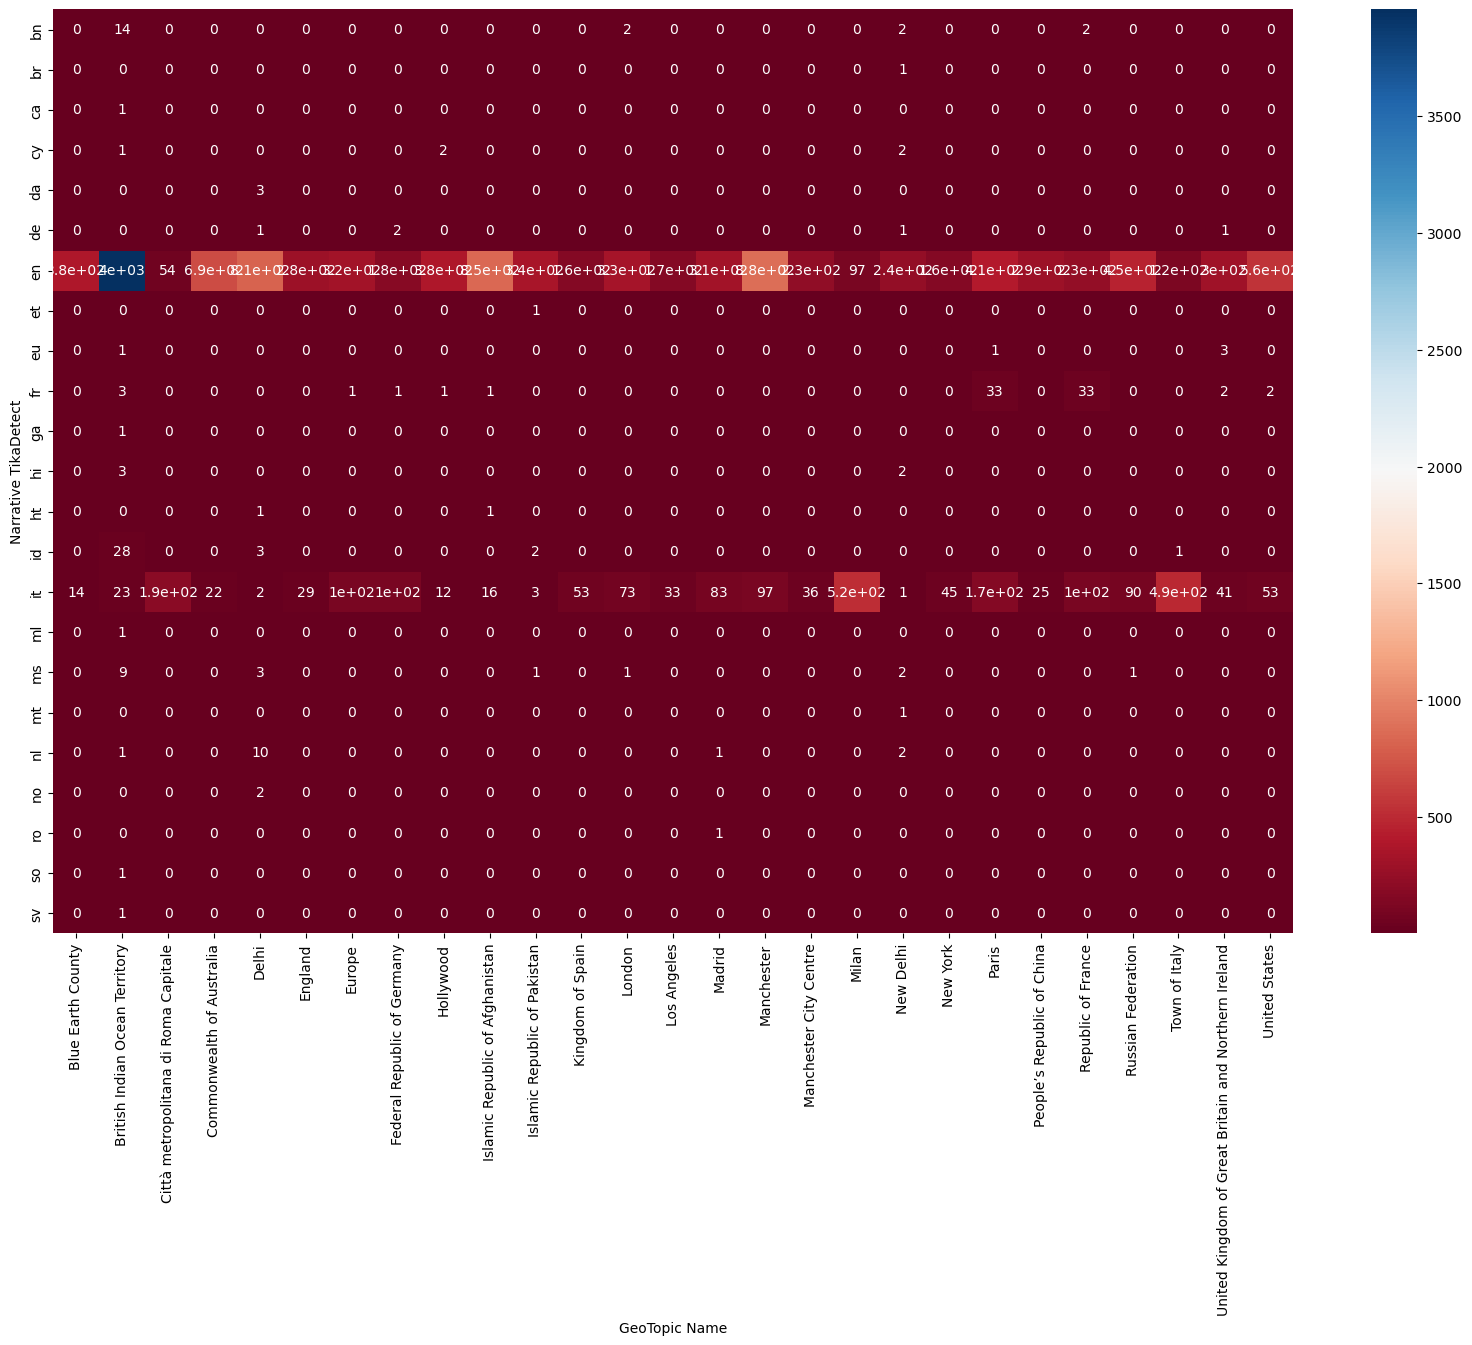

In [14]:
# Set figure size
fig, ax = plt.subplots(figsize=(20, 12))

# create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())

# Save the chart as a PNG image
fig.savefig('q2_figures/tikaLanguageVsLocationHeatMap.png')

# Show figure
plt.show()

# Close the figure to free up memory
plt.close(fig)

In the figures "tikaLanguageVsLocationHeatMap.png" and "googleLanguageVsLocationHeatMap", we can see that a majority of the clustering is for language code en (english). The largest clusetrings though is for the GeoTopics of "British Indian Ocean Territory", "Delhi", "Manchester", and "Islamic Republic of Afghanistan". Behind the language code en (english), the second highest language code is it (italian), with ofcourse the GeoTopic "Town of Italy" (and other related GeoTopics) have the highest clustering.